In [1]:
#Import functions 

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
#Import text file 

In [4]:
gen_pro = pd.read_csv('/Users/cmdb/data/matrix_1kg.txt', sep = "\t")
gen_pro

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#subset excluding first 5 columns

In [6]:
sub_gen_pro = gen_pro.iloc[:, 4:]

allele_freq = (sub_gen_pro.mean(axis = 1))/2 #calculate allele frequency: (sum all 0s, 1s and 2s)/(number of humans * 2 (chromosomes))
allele_freq
type(allele_freq)

pandas.core.series.Series

In [7]:
#craete histogram of allele freqeuncy 

Text(0.5, 1.0, 'Allele Frequency Distribution')

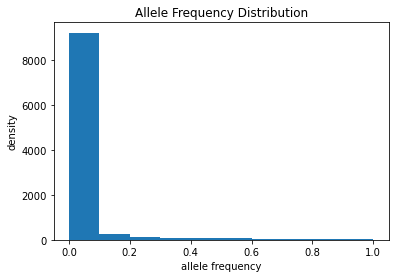

In [8]:
fig, ax = plt.subplots()
plt.hist(allele_freq)
plt.xlabel("allele frequency")
plt.ylabel("density")
plt.title("Allele Frequency Distribution")

In [15]:
com_var = sub_gen_pro.loc[(allele_freq>=0.05) & (allele_freq<=0.95)]
com_var

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


In [26]:
com_var = com_var.T
com_var_standard = StandardScaler().fit_transform(com_var)
pca = PCA(n_components = 2, )
pca_output = pca.fit_transform(com_var_standard)

In [27]:
pca_output_df = pd.DataFrame(data = pca_output, 
                             columns = ['PC1', 'PC2'])
pca_output_df


,PC1,PC2
0,-6.144930,-9.818567
1,-6.133884,-8.631829
2,-6.238473,-7.971870
3,-5.051218,-7.008727
4,-6.634383,-8.543670
...,...,...
2543,-6.304582,-0.169819
2544,-6.295888,-3.116491
2545,-4.096947,-2.827361
2546,-6.263462,-2.585080


In [28]:
pca.explained_variance_ratio_


array([0.09463232, 0.03785539])

Text(0, 0.5, 'PC2')

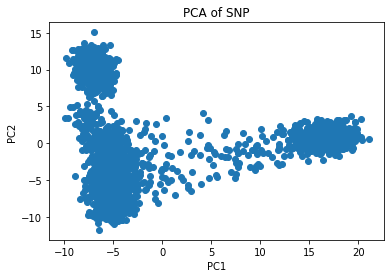

In [30]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
plt.title("PCA of SNP")
plt.xlabel('PC1')
plt.ylabel('PC2')

In [25]:
pca.explained_variance_ratio_

array([0.41079167, 0.05439207])